# Decision Trees and Random Forests in Python

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


# Checking out data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.3+ KB


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [10]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

# Visualizing data

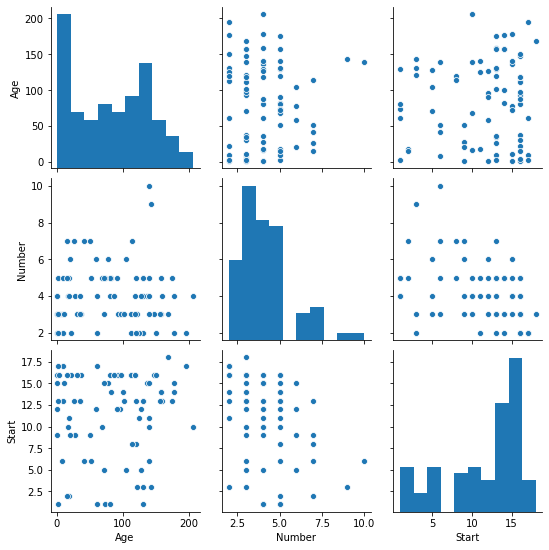

In [6]:
sns.pairplot(df)

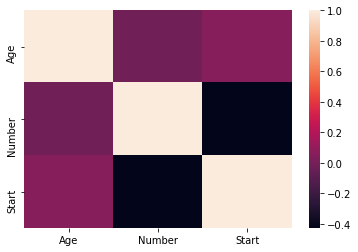

In [19]:
sns.heatmap(df.corr())

In [20]:
df['Kyphosis']=df['Kyphosis'].map({'absent':0,'present':1})
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


# Making model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [22]:
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [24]:
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
prediction=tree_model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
print(confusion_matrix(y_test,prediction))

[[12  5]
 [ 6  2]]


In [28]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
predict=rfc.predict(x_test)

In [33]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [34]:
print(confusion_matrix(y_test,predict))

[[17  0]
 [ 6  2]]


In [ ]:
Made by: Afham Fardeen
Gmail : afhamafrdeen98@gmail.com